## Metodos Alterados
<br>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

caminhos = ['Componentes', 'Classes', 'Servidor', 'Cliente']
#caminhos = ['Componentes','Classes']
Correcao = ['anderson.albuquerque', 'darlley.silva', 'murilo.guollo', 'wilian.ivo', 'gessileini.clinio', 'william.colombo', 'roni.beltramin', 'cesar.pamplona', 'taissiane.moroso', 'douglas.zuliani', 'francisco.gomes'] 


In [2]:
def Grafico(df):
    Metodos = df.NOME.value_counts().to_frame() #index #.tolist()
    #Files[:20].plot(kind='barh')
    #Files = Files.filter(like='.pas', axis=0)

    Metodos[:20].plot(kind='barh')
    plt.title("Metodos mais alterados")
    plt.show()

In [3]:
def File(df):
    df = df.assign(file=df['ARQUIVO'].str.split("/"))
    files = []
    for row in df['ARQUIVO']:
        files.append(row.split('/')[-1])
    df['FILE'] = files
    df = df.drop('ARQUIVO', axis=1)
    return df

In [4]:
def Equipe(d): #desenv
    return d in Correcao

In [5]:
def Conta(df):
    Salts_counts = df.SALT.value_counts()
    df['conta'] = df.SALT.apply(lambda y: 1 if y not in Salts_counts else Salts_counts[y])

In [6]:
def HorasMetodo(df):
    dfSaltsMerge = pd.read_csv('SaltHorasDesenv.csv', encoding='ISO-8859-1', delimiter=',')
    dfSaltsMerge = dfSaltsMerge.drop('PerdeuPrazoSla', axis=1)#.set_index('Salt')#.reset_index()
    dfSaltsMerge['SALT'] = dfSaltsMerge.Salt # = dfSaltsMerge.Salt.value_counts()
    df = df.merge(dfSaltsMerge, how='right', on='SALT')
    df['Media'] = df.HORASTOTAIS / df.conta
    #print (df.head(15))
    HorasFile = df.groupby('NOME', as_index=False).agg({"Media": "sum"})
    HorasFile = HorasFile.set_index('NOME').sort_values(by='Media', ascending=False)
    HorasFile.head(10)
    HorasFile[:20].plot(kind='barh')
    plt.title("Metodos e horas gastas")
    plt.show()

In [7]:
def Alteracoes(ApenasCorrecao):
    for caminho in caminhos:
        arquivo = caminho + '.csv'
        #if os.path.isfile(arquivo):
        #    continue
        df = pd.read_csv(arquivo, encoding='ISO-8859-1', delimiter=',')
        print (df.shape)
        if ApenasCorrecao:
            df['Correcao'] = df.DESENV.apply(Equipe)
            df = df[df.Correcao == True]
            Conta(df)
            HorasMetodo(df)
        print (arquivo)
        #df.to_csv(path_or_buf=arquivo, index=False)
        #print (df.shape[0])
        if df.shape[0] > 0:
            #print (df.head(10))
            #print (df.query("Media > 10"))
            df = File(df)
            Grafico(df)
    df = []

(7368, 5)


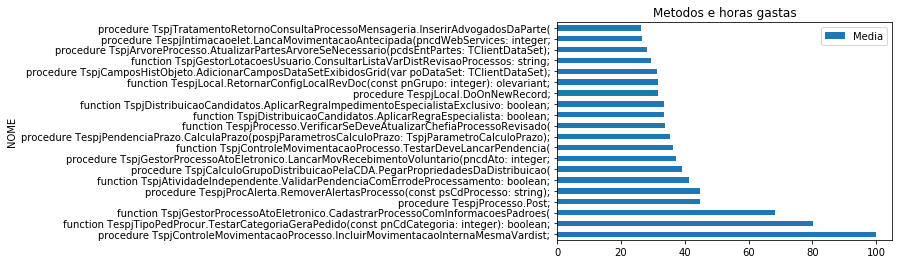

Componentes.csv


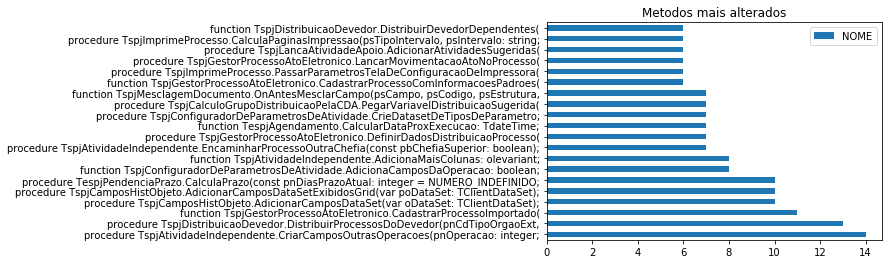

(55, 8)


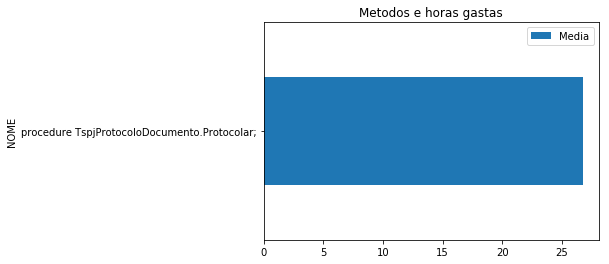

Classes.csv


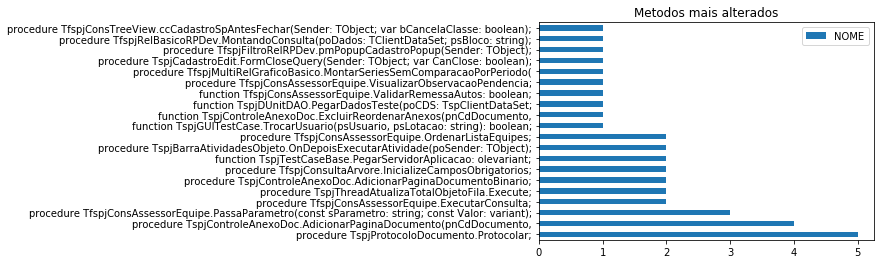

(3869, 8)


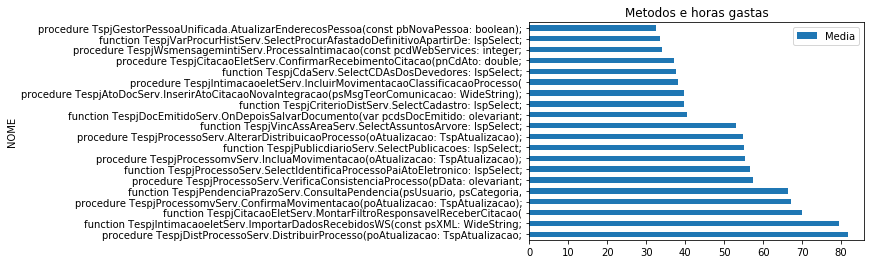

Servidor.csv


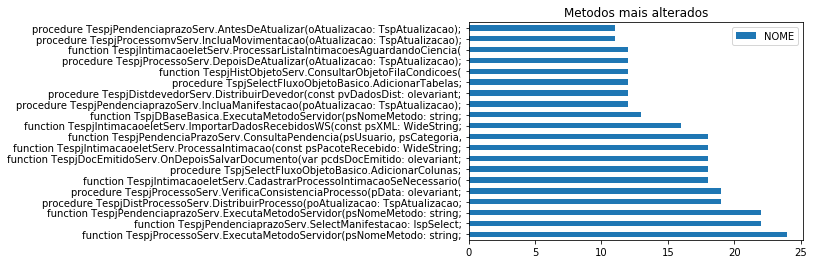

(2606, 8)


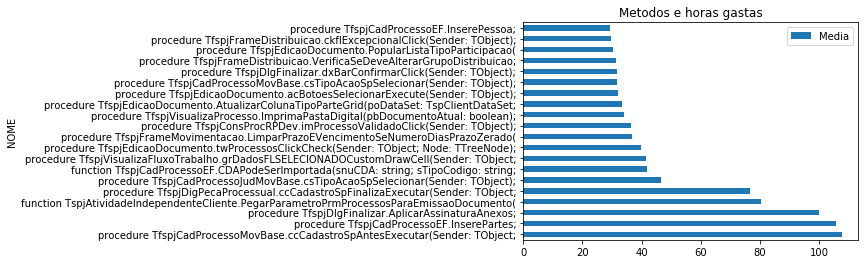

Cliente.csv


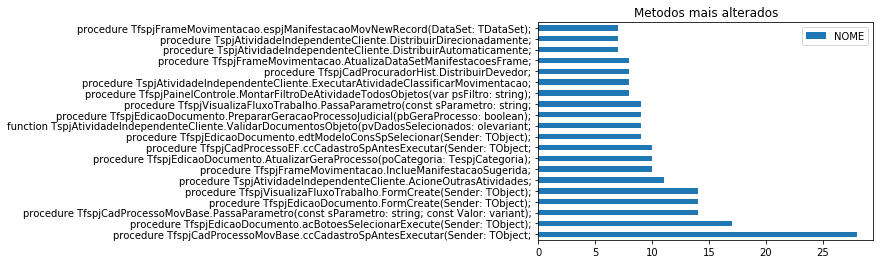

In [8]:
Alteracoes(True)

(6957, 5)
Componentes.csv


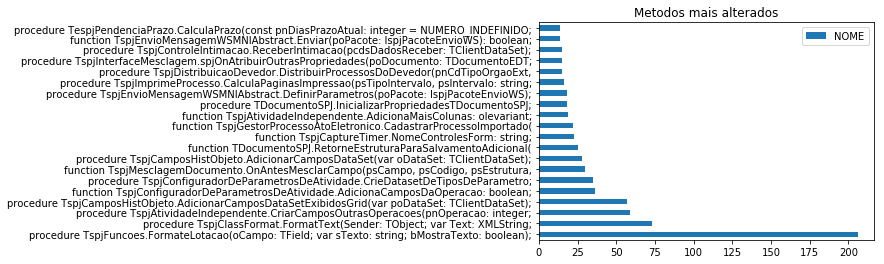

(240, 5)
Classes.csv


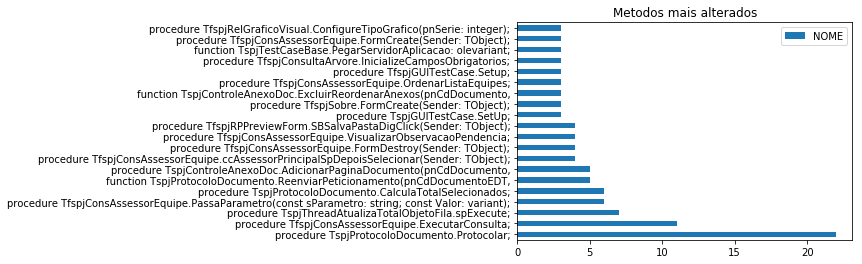

(11963, 5)
Servidor.csv


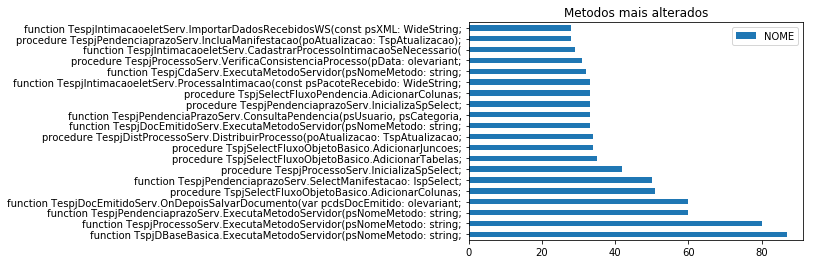

(9531, 5)
Cliente.csv


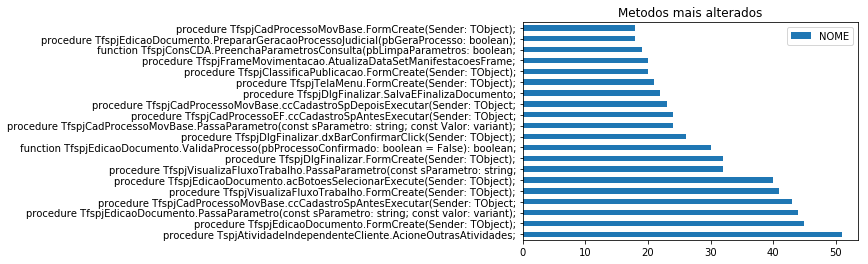

In [49]:
Alteracoes(False)

In [32]:
df = pd.read_csv('Classes.csv', encoding='ISO-8859-1', delimiter=',')
#df[df.NOME == 'procedure TfspjRelBasicoRPDev.pbFirstClick;']['ARQUIVO'][327839][-30:]
df[df.NOME.str.contains('Protocolar')]

,ARQUIVO,CHANGESET,DESENV,NOME,SALT
48,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Classes\...,522344,douglas.zuliani,procedure TspjProtocoloDocumento.Protocolar;,244884/1
49,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Classes\...,520791,darlley.silva,procedure TspjProtocoloDocumento.Protocolar;,244884/1
50,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Classes\...,519770,valdenir.albino,procedure TspjProtocoloDocumento.Protocolar;,227074/1
90,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Classes\...,434415,luhan.silva,procedure TspjProtocoloDocumento.Protocolar;,197544/2
93,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Classes\...,415537,ulisses.campos,procedure TspjProtocoloDocumento.Protocolar;,186684/4
96,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Classes\...,414004,fabio.schunig,procedure TspjProtocoloDocumento.Protocolar;,199968/1
105,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Classes\...,411945,robledo.fortuna,procedure TspjProtocoloDocumento.Protocolar;,196294/2
106,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Classes\...,411399,cassio.roos,procedure TspjProtocoloDocumento.Protocolar;,102595/1
129,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Classes\...,393178,robledo.fortuna,procedure TspjProtocoloDocumento.Protocolar;,194731/2
131,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Classes\...,392511,robledo.fortuna,procedure TspjProtocoloDocumento.Protocolar;,194731/2


## Apenas correção

(6957, 6)
Componentes.csv


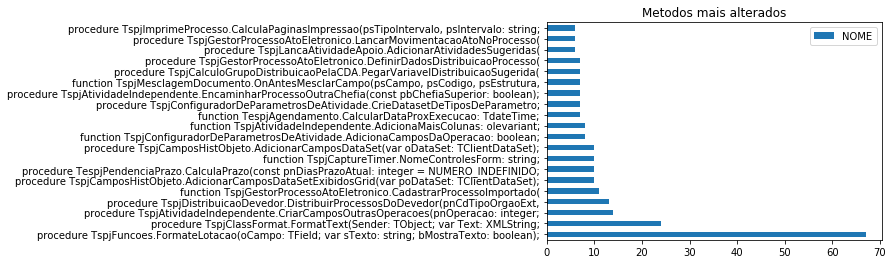

(240, 6)
Classes.csv


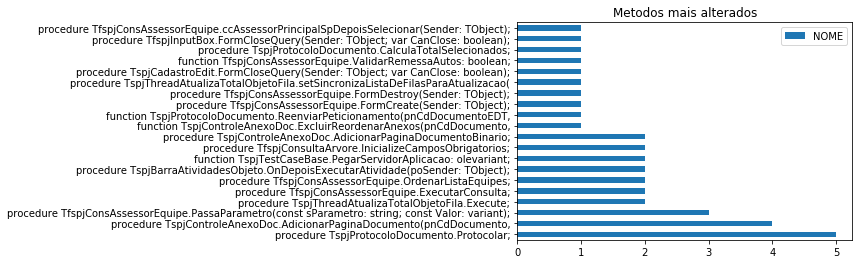

(11963, 6)
Servidor.csv


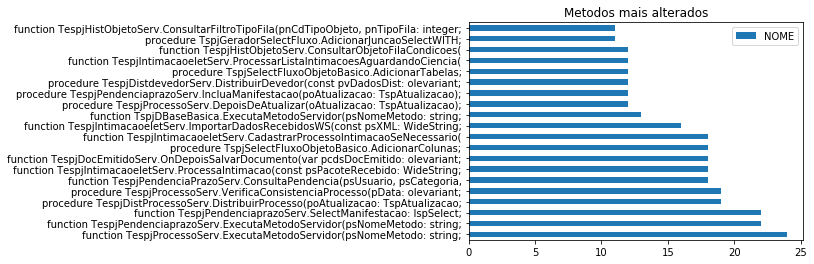

(9531, 6)
Cliente.csv


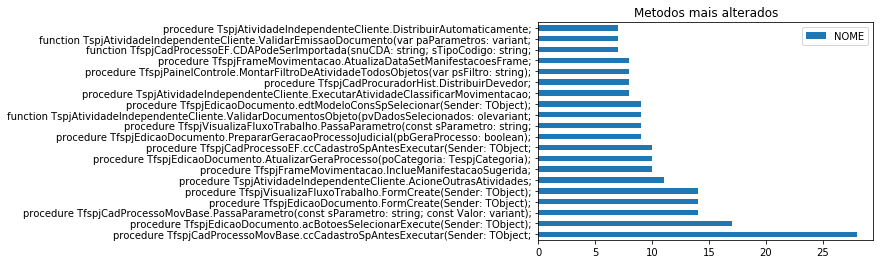

In [60]:
Alteracoes(True)